In [1]:
# Project 4: Customer Segmentation Pipeline 
# Goal: Segment customers into groups using K-Means Clustering based on spending behavior
# In this project, I will use fallback to demonstrate that in case we cannot get data from using API
# we need to have a backup plan to get data from synthetic data set

import pandas as pd
import numpy as np
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# PHASE 1: DATA ENGINEERING 

def fetch_customer_data():
    url = "https://raw.githubusercontent.com/stephaniestindra/mall_customer_segmentation/master/Mall_Customers.csv"
    
    # Add headers to mimic a real browser (prevents blocking)
    headers = {"User-Agent": "Mozilla/5.0"}
    
    print("Attempting to fetch data from API...")
    try:
        response = requests.get(url, headers=headers, timeout=5)
        if response.status_code == 200:
            df = pd.read_csv(io.StringIO(response.content.decode('utf-8')))
            # Rename columns to standard format
            df.columns = ["CustomerID", "Gender", "Age", "Income", "Score"]
            print("Successfully loaded data from API.")
            return df
    except Exception as e:
        print(f"API Connection failed: {e}")

    # FALLBACK 
    # If API fails, I will generate this synthetic data 
    print("Generating synthetic customer data instead...")
    np.random.seed(42)
    n_samples = 200
    
    # Create 5 distinct clusters for demo purposes
    # 1. Low Income, Low Score
    c1 = np.random.normal(25, 10, (40, 2))
    # 2. Low Income, High Score
    c2 = np.random.normal([25, 80], 10, (40, 2))
    # 3. Average Income, Average Score
    c3 = np.random.normal([55, 50], 10, (40, 2))
    # 4. High Income, Low Score
    c4 = np.random.normal([85, 20], 10, (40, 2))
    # 5. High Income, High Score
    c5 = np.random.normal([85, 80], 10, (40, 2))
    
    data = np.concatenate([c1, c2, c3, c4, c5])
    df = pd.DataFrame(data, columns=['Income', 'Score'])
    df['CustomerID'] = range(1, 201) # Dummy ID
    return df

# 1. Load Data
df = fetch_customer_data()
print(f"Data Ready. Shape: {df.shape}")



Attempting to fetch data from API...
Generating synthetic customer data instead...
Data Ready. Shape: (200, 3)


In [2]:
# PHASE 2: DATA TRANSFORMATION
# I focus on Income and Score for segmentation
X = df[['Income', 'Score']]

# Standardize data (for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:
# PHASE 3: MACHINE LEARNING (K-Means)
k = 5
print(f"\nRunning K-Means Clustering with k={k}...")

kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)
## ALGORITHM USED: K-Means Clustering
# Unsupervised Machine Learning
# To group data points into 'k' clusters based on feature similarity (Income & Score)
# It iteratively calculates the centroids (means) of clusters to minimize the distance between data points and their respective cluster center

# Add results back to DataFrame
df['Cluster'] = y_kmeans




Running K-Means Clustering with k=5...


C:\Users\haing\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


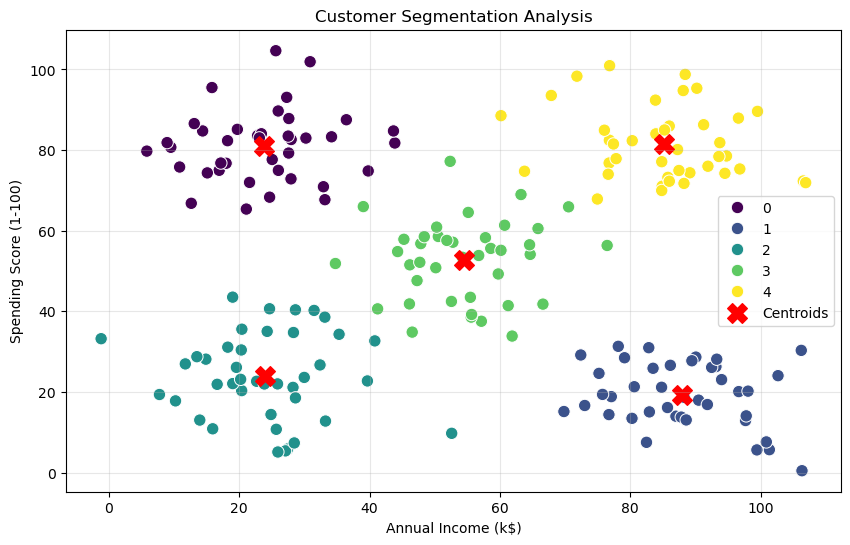


 Marketing Insight: 
            Income      Score
Cluster                      
0        23.745855  81.020809
1        87.987472  19.295824
2        23.984251  23.900415
3        54.418781  52.723702
4        85.174794  81.425010

Recommendation: Identify the Cluster with High Income & High Score -> Target for Premium Products.


In [4]:
# PHASE 4: VISUALIZATION & INSIGHTS
# Get centroids for plotting, convert back to original scale
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 6))

# Plot the clusters
sns.scatterplot(x='Income', y='Score', hue='Cluster', data=df, 
                palette='viridis', s=80, legend='full')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
# DEFINITION: A centroid is the geometric center of a cluster.
# It represents the average values (e.g., Average Income, Average Score) of all data points in that group.
# It interpret the cluster's characteristics. 
# For example, a centroid with high income and high score defines the "VIP" customer segment.

plt.title('Customer Segmentation Analysis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Business Insight
print("\n Marketing Insight: ")
# Calculate average income/score per cluster
summary = df.groupby('Cluster')[['Income', 'Score']].mean()
print(summary)
print("\nRecommendation: Identify the Cluster with High Income & High Score -> Target for Premium Products.")

**INTERPRETATION OF RESULTS:**

According to the above result from data analytics, I can withdraw these important interpretation: 

The table displays the centroid (average value) for each cluster:
- Cluster 4 represents our "Ideal Customers" with high income (~85k) and high spending scores.
- Cluster 1 represents "Frugal High-Earners" (high income, low spending).
- Cluster 3 represents the "Average Customer."

According to the result, we should target Cluster 4 with premium product advertisements.